# LR BY Hand
# Using Least Squares Method

y = a + bx


b = sum((x(i) - mean(x)) * (y(i) - mean(y))) / sum( (x(i) - mean(x))^2 )


OR


b = covariance(x,y) / variance(x)

a = mean(y) - b * mean(x)

# Covariance (x,y) :

- It is a value of how y changes as per change in x

- it is sum of product of (x-mean_x) and (y-mean_y)

# Variance (x) :

- It is how x varies wrt itself

- it is sum of square of (x - mean_x)

In [ ]:
import pandas as pd

In [ ]:
from math import sqrt

# Calculate the mean value of a list of numbers
def mean(values):
    return sum(values) / float(len(values))

# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar

# Calculate the variance of a list of numbers
def variance(values, mean):
    return sum([(x - mean)**2 for x in values])

# Training of linear regression model

In [ ]:
# Calculate coefficients
def coefficients(dataset):
    x = [row[0] for row in dataset]
    y = [row[1] for row in dataset]
    x_mean, y_mean = mean(x), mean(y)
    # General equation of Linear regression is::
    # y = b0 + b1 * x1 + b2 * x2 + b3 * x3 ....
    # Here only x1 is present
    # Coefficient / Slope of the line b1 / B / M
    b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
    # m=b1
    # Intercept b0 / C / A
    b0 = y_mean - b1 * x_mean
    # c = b0
    return [b0, b1]
    # return [c , m]

In [ ]:
# Simple linear regression algorithm
def simple_linear_regression(train, test):
    predictions = list()
    b0, b1 = coefficients(train)
    print("Coefficients after Training are b0 =", b0, " b1=", b1)
    for row in test:
        yhat = b0 + b1 * row[0] # Calculate the prediction
        predictions.append(yhat)
    return predictions

In [ ]:
# Calculate root mean squared error
def rmse_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = actual[i] - predicted[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(actual))
    return sqrt(mean_error)

In [ ]:
# Evaluate regression algorithm on training dataset
def evaluate_algorithm(dataset, algorithm):
    test_set = list()
    for row in dataset:
        row_copy = list(row)
        row_copy[-1] = None
        test_set.append(row_copy)
    predicted = algorithm(dataset, test_set)
    actual = [row[-1] for row in dataset]
    for i in range(len(dataset)):
      print("Input Value (x1) is ", dataset[i][0])
      print("Predicted Values is ::",predicted[i])
    rmse = rmse_metric(actual, predicted)
    return rmse

In [ ]:
# Test simple linear regression
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]] ##[ x, y ]
rmse = evaluate_algorithm(dataset, simple_linear_regression)
print('RMSE: %.3f' % (rmse))

Coefficients after Training are b0 = 0.39999999999999947  b1= 0.8
Input Value (x1) is  1
Predicted Values is :: 1.1999999999999995
Input Value (x1) is  2
Predicted Values is :: 1.9999999999999996
Input Value (x1) is  4
Predicted Values is :: 3.5999999999999996
Input Value (x1) is  3
Predicted Values is :: 2.8
Input Value (x1) is  5
Predicted Values is :: 4.3999999999999995
RMSE: 0.693


# LSM using Numpy array

In [ ]:
# # WAP to find linear regression coefficients given x_train and y_train data
def lr_coeff(x_train,y_train): #same coefficients
    x_t = x_train - x_train.mean()
    y_t = y_train - y_train.mean()
    covar = sum(x_t*y_t)
    var = sum(x_t**2) # np.dot
    b = covar / var
    a = y_train.mean() - b * x_train.mean()
    return a,b

In [ ]:
import numpy as np
X = np.array([1,2,4,7,9])
Y = np.array([2,4,7,15,18])
lr_coeff(X,Y)

(-0.3053097345132745, 2.066371681415929)

### Verify Numpy implementation with simple one

In [ ]:
dataset = [[1, 2], [2, 4], [4, 7], [7, 15], [9, 18]] ##[ x, y ]
rmse = evaluate_algorithm(dataset, simple_linear_regression)
print('RMSE: %.3f' % (rmse))

Coefficients after Training are b0 = -0.3053097345132745  b1= 2.066371681415929
Input Value (x1) is  1
Predicted Values is :: 1.7610619469026547
Input Value (x1) is  2
Predicted Values is :: 3.827433628318584
Input Value (x1) is  4
Predicted Values is :: 7.960176991150442
Input Value (x1) is  7
Predicted Values is :: 14.159292035398229
Input Value (x1) is  9
Predicted Values is :: 18.29203539823009
RMSE: 0.600


# Library Method


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
# Three features in X (x1 x2 and x3)
X = np.array([[1, 1,4], [1, 2,5], [2, 2,10], [2, 3,3]])

In [ ]:
# Calculate actual y
# y = 1 * x_1 + 2 * x_2 + 0.5 * x_3 + 3
y = np.dot(X, np.array([1, 2,0.5])) + 3
# y = np.dot(X, np.array([1.5, 4.5,67])) + 5.5

In [ ]:
reg = LinearRegression().fit(X, y)

In [ ]:
reg.score(X, y)

1.0

In [ ]:
reg.coef_

array([1. , 2. , 0.5])

In [ ]:
reg.intercept_

2.9999999999999964

In [ ]:
reg.predict(np.array([[3, 5,78]]))

array([5258.5])

# Application on Actual Data

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("AutoInsurSweden.txt",sep="\t",skiprows=9)

In [ ]:
df.head()

,X,Y
0,108,"392,5"
1,19,"46,2"
2,13,"15,7"
3,124,"422,2"
4,40,"119,4"


In [ ]:
df.Y = df.Y.str.replace(',','.')

In [ ]:
df.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [ ]:
df.dtypes

X     int64
Y    object
dtype: object

In [ ]:
df.Y = df.Y.astype(float)

In [ ]:
df.dtypes

X      int64
Y    float64
dtype: object

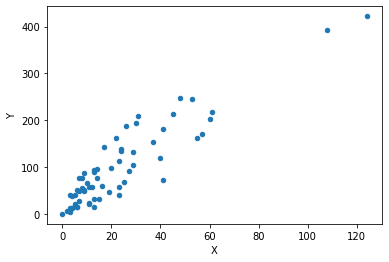

In [ ]:
df.plot(x='X', y= 'Y', kind='scatter')

In [ ]:
# Split data in Training and testing
# random balanced split
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df[['X']],df.Y,test_size  = 0.3, random_state =7)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression().fit(X_train, Y_train)

In [ ]:
reg.coef_, reg.intercept_

(array([3.33602385]), 23.75472726509068)

In [ ]:
#lr_coeff(X_train.values,Y_train.values)

In [ ]:
Y_pred = reg.predict(X_test)

In [ ]:
rmse_metric(Y_test.values,Y_pred)

35.86275705806889

### Application of Monte Karlo Simulation Theorem

In [ ]:
def simulation_regression(model,X,Y,test_size=0.3):
    from sklearn.model_selection import train_test_split
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size  = test_size)
    m = model.fit(X_train, Y_train)
    Y_pred = m.predict(X_test)

    from sklearn.metrics import mean_squared_error
    mse = mean_squared_error(Y_test,Y_pred)
    return mse ** 0.5

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = df[['X']]
Y = df['Y']
t_s = 0.3
for _ in range(10):
    err = simulation_regression(model,X,Y,t_s)
    print(t_s, err)

0.3 31.429171455324127
0.3 37.729398457690195
0.3 31.25749655010368
0.3 38.55491645410794
0.3 39.218001720415586
0.3 39.49496407306443
0.3 37.50581772207719
0.3 43.14679005661657
0.3 34.350107075834536
0.3 38.24818577735507


# Historical Quotes

In [ ]:
hq = pd.read_csv("HistoricalQuotes.csv",parse_dates=['date'],index_col = 0)

In [ ]:
hq.head()

,close,volume,open,high,low
date,,,,,
2019-08-10,200.99,"24,619,446",201.23,202.760,199.29
2019-08-09,200.99,24619750.0000,201.30,202.760,199.29
2019-08-08,203.43,27009520.0000,200.20,203.530,199.39
2019-08-07,199.04,33364400.0000,195.41,199.560,193.82
2019-08-06,197.00,35824790.0000,196.31,198.067,194.04


In [ ]:
#y -> close
# X -> all remaining values
hq.dtypes

close     float64
volume     object
open      float64
high      float64
low       float64
dtype: object

In [ ]:
hq.volume = hq.volume.str.replace(",","").astype(float)

In [ ]:
hq.head()

,close,volume,open,high,low
date,,,,,
2019-08-10,200.99,24619446.0,201.23,202.760,199.29
2019-08-09,200.99,24619750.0,201.30,202.760,199.29
2019-08-08,203.43,27009520.0,200.20,203.530,199.39
2019-08-07,199.04,33364400.0,195.41,199.560,193.82
2019-08-06,197.00,35824790.0,196.31,198.067,194.04


In [ ]:
train_count = int(hq.shape[0] * 0.7)
test_count = hq.shape[0] - train_count
train_count,test_count

(177, 76)

In [ ]:
Y_test = hq.iloc[:test_count,0]
Y_train = hq.iloc[test_count:,0]
Y_train.shape, Y_test.shape

((177,), (76,))

In [ ]:
hq_rev = hq.iloc[::-1] #hq[::-1]

In [ ]:
hq_rev.head()

,close,volume,open,high,low
date,,,,,
2018-08-09,208.88,23389530.0,207.280,209.780,207.20
2018-08-10,207.53,24592460.0,207.360,209.100,206.67
2018-08-13,208.87,25864510.0,207.700,210.952,207.70
2018-08-14,209.75,20679270.0,210.155,210.560,208.26
2018-08-15,210.24,28595230.0,209.220,210.740,208.33


In [ ]:
hq_rev.describe()

,close,volume,open,high,low
count,253.000000,253.000000,253.000000,253.000000,253.000000
mean,193.091858,17.222939,193.031711,195.073753,191.073962
std,21.750344,0.372905,21.772060,21.914049,21.700140
min,142.190000,16.245789,143.980000,145.720000,142.000000
25%,174.870000,16.958413,174.940000,176.000000,173.940000
50%,197.000000,17.203832,196.450000,199.260000,194.040000
75%,208.880000,17.472995,209.220000,210.640000,207.290000
max,232.070000,18.375517,230.780000,233.470000,229.780000


In [ ]:
import numpy as np

In [ ]:
hq_rev.volume = np.log(hq_rev.volume)

In [ ]:
Y_train = hq_rev.iloc[:train_count,1] #Volume is target variable
Y_test = hq_rev.iloc[train_count:,1]
Y_train.shape, Y_test.shape

((177,), (76,))

In [ ]:
X_train = hq_rev.iloc[:train_count,[0,2,3,4]] # X is close open high & low
X_test = hq_rev.iloc[train_count:,[0,2,3,4]]
X_train.shape, X_test.shape

((177, 4), (76, 4))

In [ ]:
X_train.head()

,close,open,high,low
date,,,,
2018-08-09,208.88,207.280,209.780,207.20
2018-08-10,207.53,207.360,209.100,206.67
2018-08-13,208.87,207.700,210.952,207.70
2018-08-14,209.75,210.155,210.560,208.26
2018-08-15,210.24,209.220,210.740,208.33


In [ ]:
reg = LinearRegression().fit(X_train, Y_train)

In [ ]:
reg.coef_, reg.intercept_

(array([-0.02487968, -0.01492586,  0.14495544, -0.10907843]),
 17.51450484680442)

In [ ]:
Y_pred = reg.predict(X_test)

In [ ]:
rmse_metric(Y_test.values,Y_pred)

0.2789655336730077

# Plot Predicted and actual values

In [ ]:
res = pd.DataFrame([Y_pred,Y_test])
res = res.T
res.columns = ['Y_pred','Y_test']

In [ ]:
res.head()

,Y_pred,Y_test
0,17.061864,16.731325
1,17.042211,16.739358
2,16.992772,16.907024
3,17.256385,17.638728
4,17.532072,17.987238


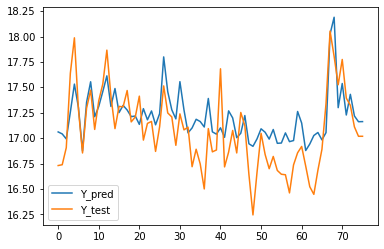

In [ ]:
res[['Y_pred', 'Y_test']].plot()

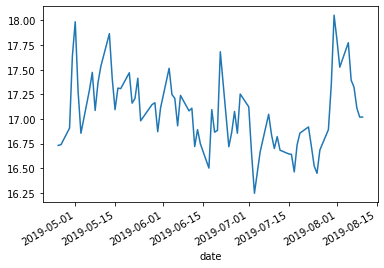

In [ ]:
Y_test.plot()

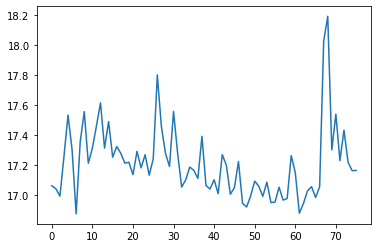

In [ ]:
pd.Series(Y_pred).plot()

# Exercise

Take open and close values of stock from above data

Predict value of close using open

Plot the actual and predicted values

Calculate the RMSE


In [ ]:
hq_rev.head()

,close,volume,open,high,low
date,,,,,
2018-08-09,208.88,16.967799,207.280,209.780,207.20
2018-08-10,207.53,17.017950,207.360,209.100,206.67
2018-08-13,208.87,17.068382,207.700,210.952,207.70
2018-08-14,209.75,16.844642,210.155,210.560,208.26
2018-08-15,210.24,17.168750,209.220,210.740,208.33


In [ ]:
Y_train = hq_rev.iloc[:train_count,0] #Close is target variable
Y_test = hq_rev.iloc[train_count:,0]
Y_train.shape, Y_test.shape

((177,), (76,))

In [ ]:
X_train = hq_rev.iloc[:train_count,2] # X is close open high & low
X_test = hq_rev.iloc[train_count:,2]
X_train.shape, X_test.shape

((177,), (76,))

In [ ]:
X_train = X_train.values.reshape(-1,1) # adding Dummy dim
X_test = X_test.values.reshape(-1,1) # adding Dummy dim
X_train.shape, X_test.shape

((177, 1), (76, 1))

In [ ]:
X_train = hq_rev.iloc[:train_count,[2]] # X is close open high & low
X_test = hq_rev.iloc[train_count:,[2]]
X_train.shape, X_test.shape

((177, 1), (76, 1))

In [ ]:
reg = LinearRegression().fit(X_train, Y_train)

In [ ]:
reg.coef_, reg.intercept_

(array([0.99442609]), 1.1057457142033797)

In [ ]:
Y_pred = reg.predict(X_test)

In [ ]:
rmse_metric(Y_test.values,Y_pred)

1.9511649655329752

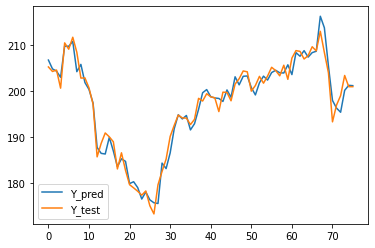

In [ ]:
res = pd.DataFrame([Y_pred,Y_test])
res = res.T
res.columns = ['Y_pred','Y_test']
res[['Y_pred', 'Y_test']].plot()

# Exercise

Use high column to predict close value of the stock

X -> high
Y -> close

In [ ]:
df = pd.read_csv("/content/HistoricalQuotes.csv")

In [ ]:
df.head()

,date,close,volume,open,high,low
0,2019/08/10,200.99,"24,619,446",201.23,202.760,199.29
1,2019/08/09,200.99,24619750.0000,201.30,202.760,199.29
2,2019/08/08,203.43,27009520.0000,200.20,203.530,199.39
3,2019/08/07,199.04,33364400.0000,195.41,199.560,193.82
4,2019/08/06,197.00,35824790.0000,196.31,198.067,194.04


In [ ]:
df.dtypes

date       object
close     float64
volume     object
open      float64
high      float64
low       float64
dtype: object

In [ ]:
X = df[['high']] #high column
Y = df['close']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size  = 0.3, random_state =7)

In [ ]:
reg = LinearRegression().fit(X_train, Y_train)

In [ ]:
reg.coef_

array([0.98969882])

In [ ]:
reg.intercept_

-0.03397848262162029

In [ ]:
Y_pred = reg.predict(X_test)

In [ ]:
rmse_metric(Y_test.values,Y_pred)

1.737890802048508